<a href="https://colab.research.google.com/github/thanigaivelan2004/Lung_Cancer_Prediction/blob/main/mini_project_lung_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
data = pd.read_csv("/content/cancer patient data sets.csv")

In [ ]:
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
data = data.drop(['index','Patient Id'], axis=1)

In [ ]:
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [ ]:
data.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [ ]:
data.shape

(1000, 24)

In [ ]:
data.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
data['Level'] = data['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

In [ ]:
data['Level'].value_counts()

3    365
2    332
1    303
Name: Level, dtype: int64

<Axes: xlabel='Level', ylabel='count'>

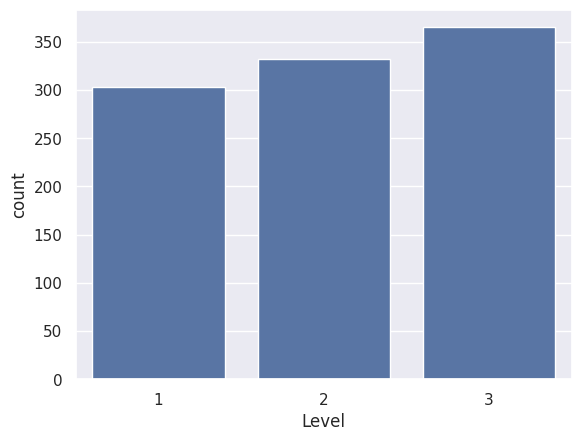

In [ ]:
sn.countplot(data= data ,x='Level')

<Axes: >

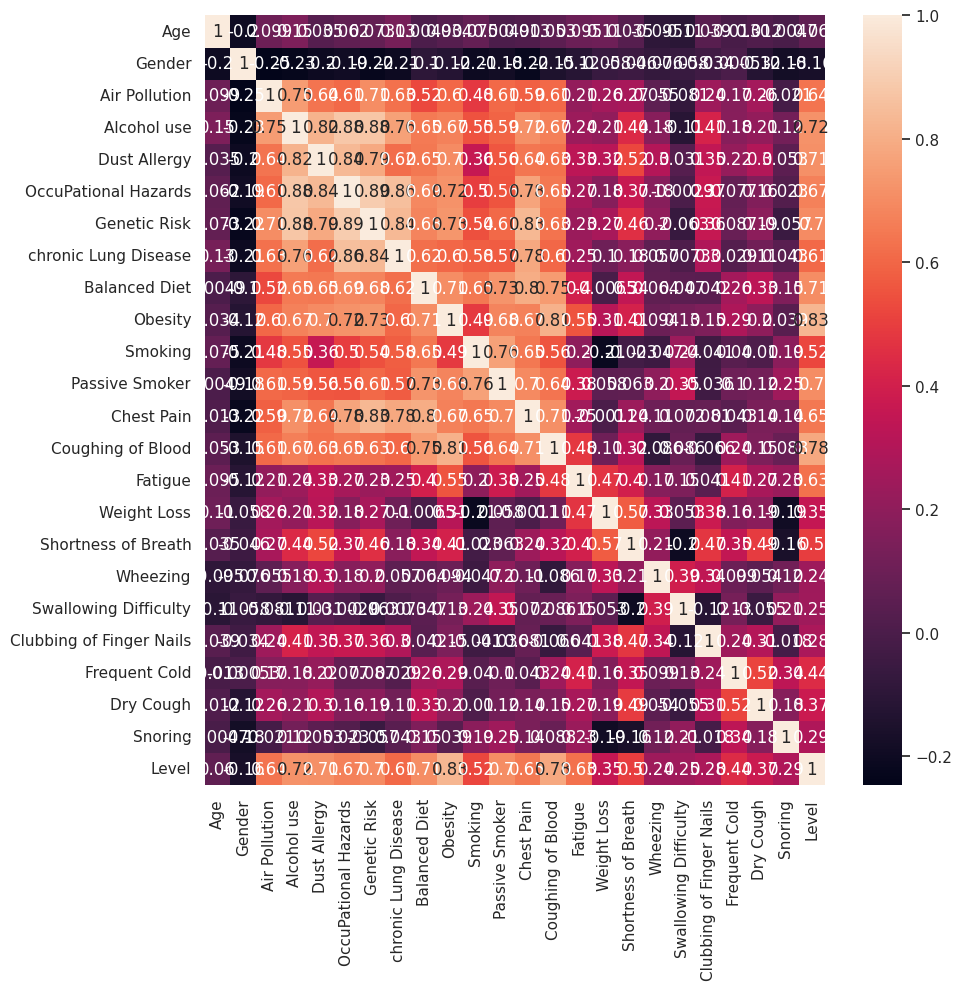

In [ ]:
plt.figure(figsize=(10,10))
sn.heatmap(data.corr() ,annot = True)

In [ ]:
data.duplicated().sum()

848

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(152, 24)

In [ ]:
x = data.drop('Level' , axis=1)
y = data[['Level']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y ,random_state = 42 ,test_size = .30)

In [ ]:
xtrain.shape

(106, 23)

In [ ]:
xtest.shape

(46, 23)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
dtc.score(xtrain,ytrain)

1.0

In [ ]:
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report

In [ ]:
cm = confusion_matrix(ytest,dtc.predict(xtest))
cm

array([[ 9,  1,  1],
       [ 0, 17,  0],
       [ 0,  1, 17]])

Text(0.5, 1.0, 'Confusion matrix')

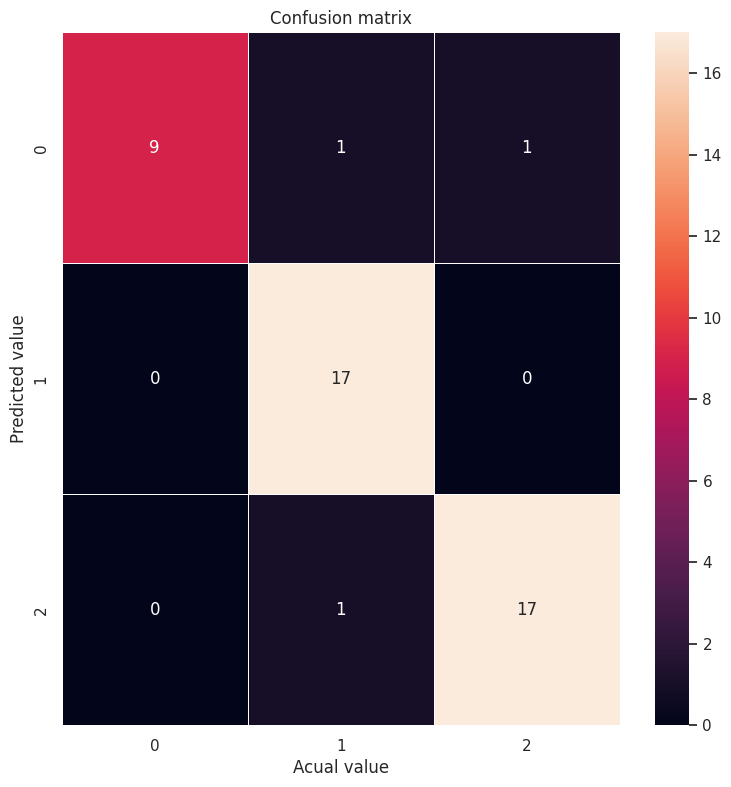

In [ ]:
plt.figure(figsize=(9,9))
sn.heatmap(cm,annot = True ,linewidth=.5)
plt.xlabel('Acual value')
plt.ylabel('Predicted value')
plt.title('Confusion matrix')

In [ ]:
print(classification_report(ytest,dtc.predict(xtest)))

              precision    recall  f1-score   support

           1       1.00      0.82      0.90        11
           2       0.89      1.00      0.94        17
           3       0.94      0.94      0.94        18

    accuracy                           0.93        46
   macro avg       0.95      0.92      0.93        46
weighted avg       0.94      0.93      0.93        46



In [ ]:
import seaborn as sns
sns.set()

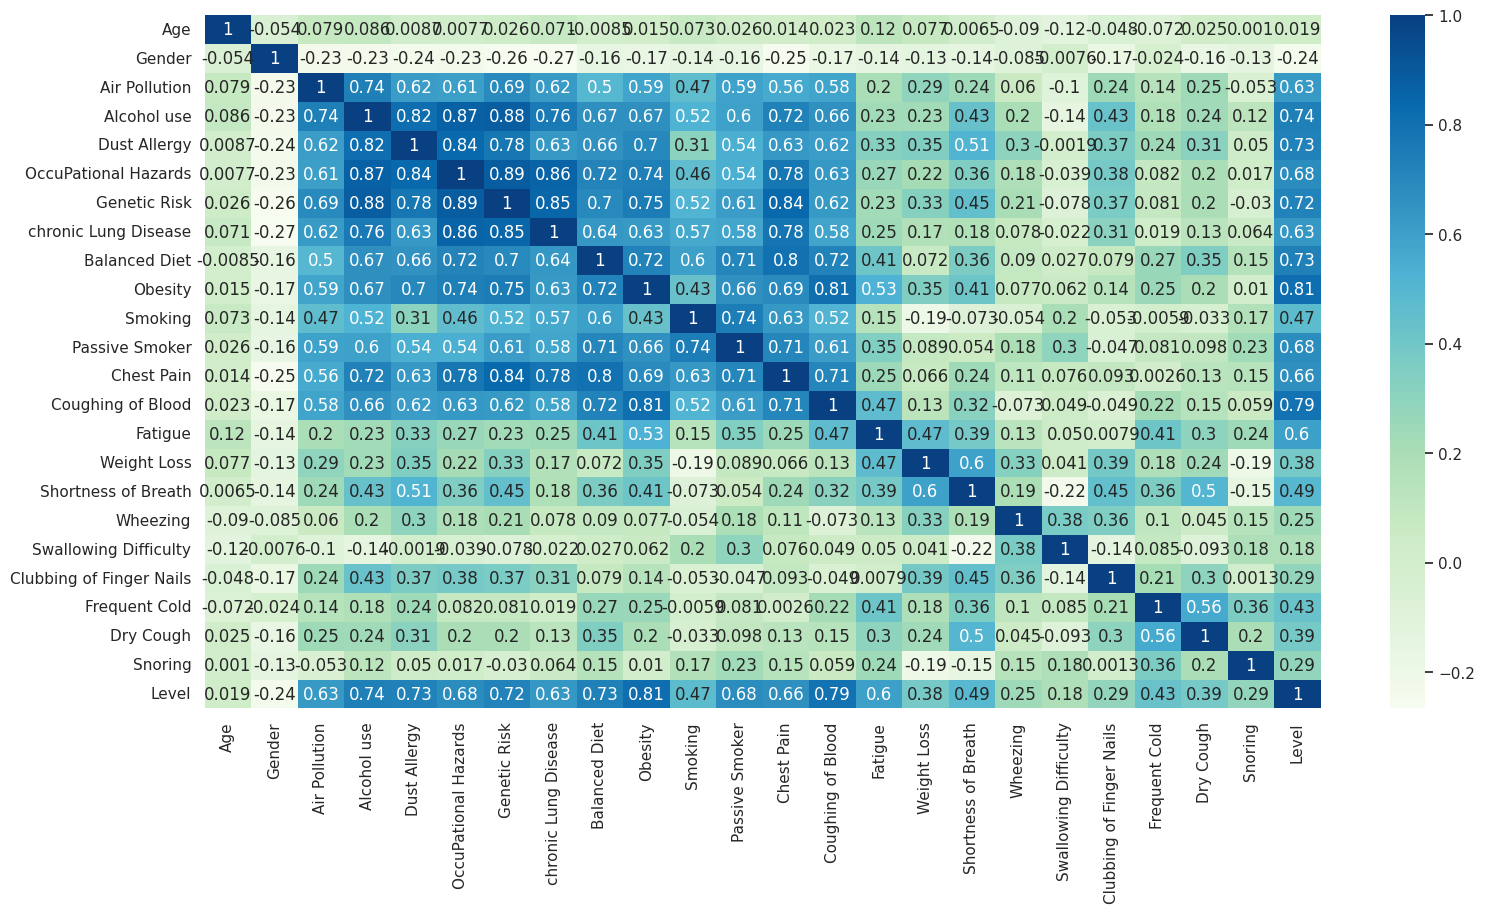

In [ ]:
plt.figure(figsize = (18,9))
sns.heatmap(data.corr(), cmap='GnBu', annot=True)
plt.show()

In [ ]:
data['Smoking'].corr(data['Passive Smoker'])

0.7435857641463668

<Axes: >

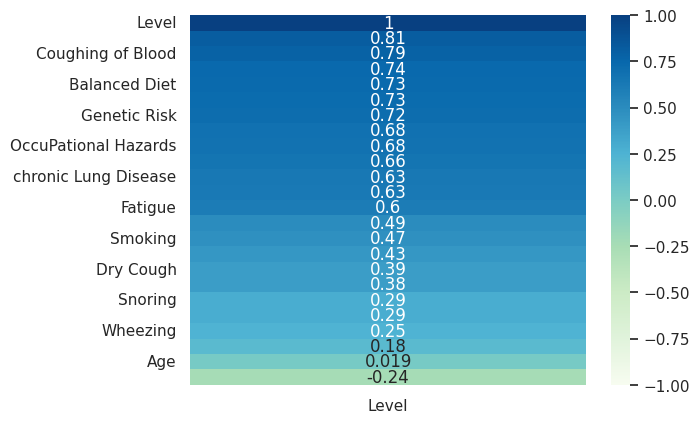

In [ ]:
sns.heatmap(data.corr()[['Level']].sort_values(by='Level', ascending=False), vmin=-1, vmax=1, annot=True, cmap='GnBu')

In [ ]:
data.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
df=data[['Age','Coughing of Blood','Dust Allergy','Passive Smoker','OccuPational Hazards','Air Pollution','chronic Lung Disease','Shortness of Breath','Dry Cough','Snoring','Swallowing Difficulty','Level']]

In [ ]:
df.head()

,Age,Coughing of Blood,Dust Allergy,Passive Smoker,OccuPational Hazards,Air Pollution,chronic Lung Disease,Shortness of Breath,Dry Cough,Snoring,Swallowing Difficulty,Level
0,33,4,5,2,4,2,2,2,3,4,3,1
1,17,3,5,4,3,3,2,7,7,2,6,2
2,35,8,6,3,5,4,4,9,7,2,1,3
3,37,8,7,7,7,7,7,3,7,5,4,3
4,46,9,7,7,7,6,6,4,2,3,4,3


In [ ]:
df['Level'].value_counts()

3    53
2    52
1    47
Name: Level, dtype: int64

In [ ]:
X=df.drop('Level',axis=1)

y=df['Level']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(solver='liblinear')
Classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_test_hat = Classifier.predict(X_test)

In [ ]:
Results = pd.DataFrame({'Actual':y_test,'Predictions':y_test_hat})
Results.head(10)

,Actual,Predictions
69,2,2
40,1,2
81,2,2
419,2,2
38,1,2
171,1,1
120,2,2
15,2,1
62,1,1
52,1,1


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_hat))

0.8260869565217391


In [ ]:
y_train_hat = Classifier.predict(X_train)

print(accuracy_score(y_train,y_train_hat))

0.8867924528301887


In [ ]:
y_test_hat_proba = Classifier.predict_proba(X_test)

print(y_test_hat_proba.shape)

(46, 3)


In [ ]:
y_test_hat_proba[0:5,:]

array([[0.0139172 , 0.98191836, 0.00416443],
       [0.44900111, 0.49498969, 0.05600919],
       [0.24854949, 0.74626823, 0.00518228],
       [0.15832386, 0.83153166, 0.01014447],
       [0.26359653, 0.606147  , 0.13025647]])

In [ ]:

array_in_scientific = y_test_hat_proba[0:5,:]
array_in_normal = np.vectorize(lambda x: format(x, '.16f'))(array_in_scientific)

print(array_in_normal)

[['0.0139172018367358' '0.9819183645301908' '0.0041644336330736']
 ['0.4490011145896113' '0.4949896937692034' '0.0560091916411853']
 ['0.2485494937494531' '0.7462682261756760' '0.0051822800748709']
 ['0.1583238634239415' '0.8315316640033157' '0.0101444725727427']
 ['0.2635965319419403' '0.6061470007986912' '0.1302564672593684']]


In [ ]:

array_in_scientific = y_test_hat_proba[0:5,:]
array_in_normal = np.vectorize(lambda x: format(x, '.16f'))(array_in_scientific)
print(array_in_normal)

[['0.0139172018367358' '0.9819183645301908' '0.0041644336330736']
 ['0.4490011145896113' '0.4949896937692034' '0.0560091916411853']
 ['0.2485494937494531' '0.7462682261756760' '0.0051822800748709']
 ['0.1583238634239415' '0.8315316640033157' '0.0101444725727427']
 ['0.2635965319419403' '0.6061470007986912' '0.1302564672593684']]


In [ ]:
pls = y_test_hat_proba[:,1]
Results = pd.DataFrame({'Actual':y_test,'Predictions':y_test_hat,'Prob(Class = 3)':pls})
Results.head(5)

,Actual,Predictions,Prob(Class = 3)
69,2,2,0.981918
40,1,2,0.494990
81,2,2,0.746268
419,2,2,0.831532
38,1,2,0.606147


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_hat)
print(cm)

[[12  4  0]
 [ 1 13  3]
 [ 0  0 13]]


Text(91.25, 0.5, 'True Label')

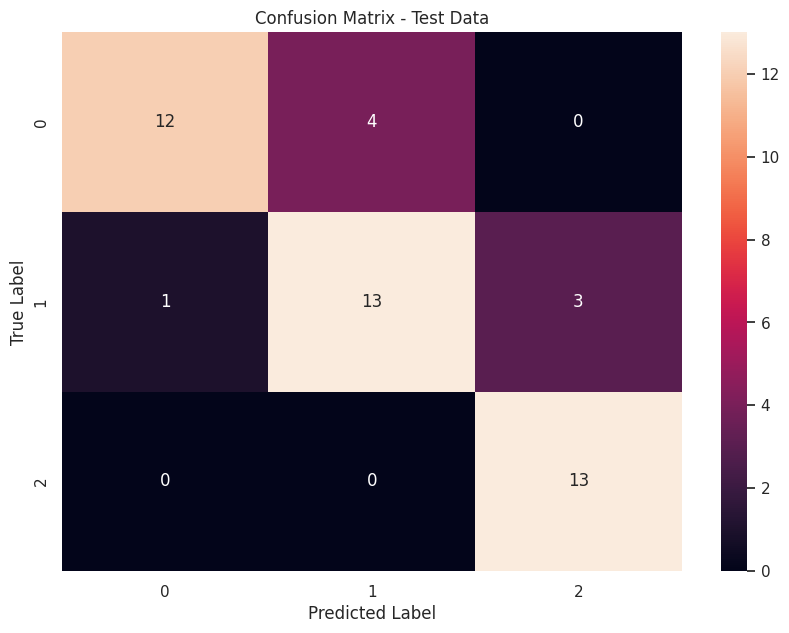

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_test_hat, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_test_hat, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_test_hat))
    print("F1 Score : ", f1_score(y_test, y_test_hat, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_test_hat))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low', 'Medium', 'High'])
    cm.plot()

Precision :  0.8260869565217391
Recall :  0.8260869565217391
Accuracy :  0.8260869565217391
F1 Score :  0.8260869565217391

 [[12  4  0]
 [ 1 13  3]
 [ 0  0 13]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           1       0.92      0.75      0.83        16
           2       0.76      0.76      0.76        17
           3       0.81      1.00      0.90        13

    accuracy                           0.83        46
   macro avg       0.83      0.84      0.83        46
weighted avg       0.83      0.83      0.82        46

******************************************************



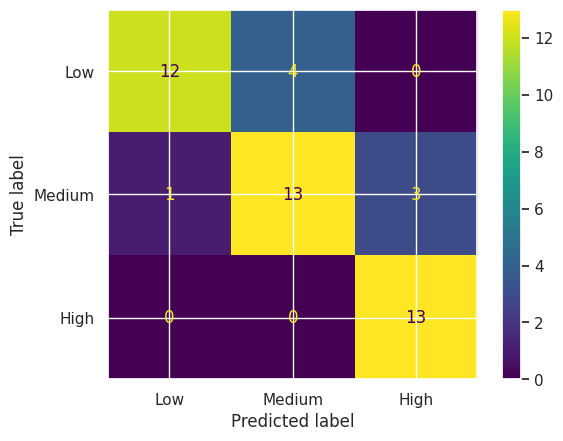

In [ ]:
perform(y_test_hat)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Level=le.fit_transform(data.Level)

In [ ]:

X = data.drop('Level', axis=1)
y = data['Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(classification_report(ytest,dtc.predict(xtest)))
print(f"Accuracy: {accuracy}")

              precision    recall  f1-score   support

           1       1.00      0.82      0.90        11
           2       0.89      1.00      0.94        17
           3       0.94      0.94      0.94        18

    accuracy                           0.93        46
   macro avg       0.95      0.92      0.93        46
weighted avg       0.94      0.93      0.93        46

Accuracy: 0.8709677419354839


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = data.drop('Level', axis=1)
y = data['Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(classification_report(ytest,dtc.predict(xtest)))

print(f"Accuracy: {accuracy}")

              precision    recall  f1-score   support

           1       1.00      0.82      0.90        11
           2       0.89      1.00      0.94        17
           3       0.94      0.94      0.94        18

    accuracy                           0.93        46
   macro avg       0.95      0.92      0.93        46
weighted avg       0.94      0.93      0.93        46

Accuracy: 0.8387096774193549


In [ ]:

X = data.drop('Level', axis=1)
y = data['Level']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9354838709677419


In [ ]:

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.83      1.00      0.91        10
           2       1.00      1.00      1.00        15

    accuracy                           0.94        31
   macro avg       0.94      0.89      0.90        31
weighted avg       0.95      0.94      0.93        31



              precision    recall  f1-score   support

           1       1.00      0.82      0.90        11
           2       0.89      1.00      0.94        17
           3       0.94      0.94      0.94        18

    accuracy                           0.93        46
   macro avg       0.95      0.92      0.93        46
weighted avg       0.94      0.93      0.93        46

Accuracy: 0.967741935483871


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

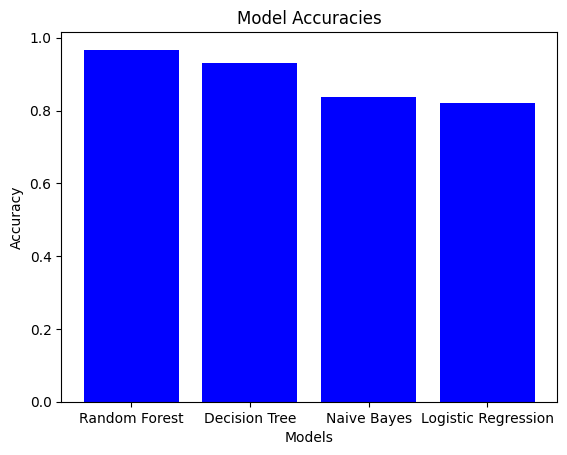

In [ ]:
import matplotlib.pyplot as plt
model_names = ['Random Forest', 'Decision Tree', 'Naive Bayes', 'Logistic Regression']
accuracies = [0.935, 0.93, 0.838, 0.82]
plt.bar(model_names, accuracies, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


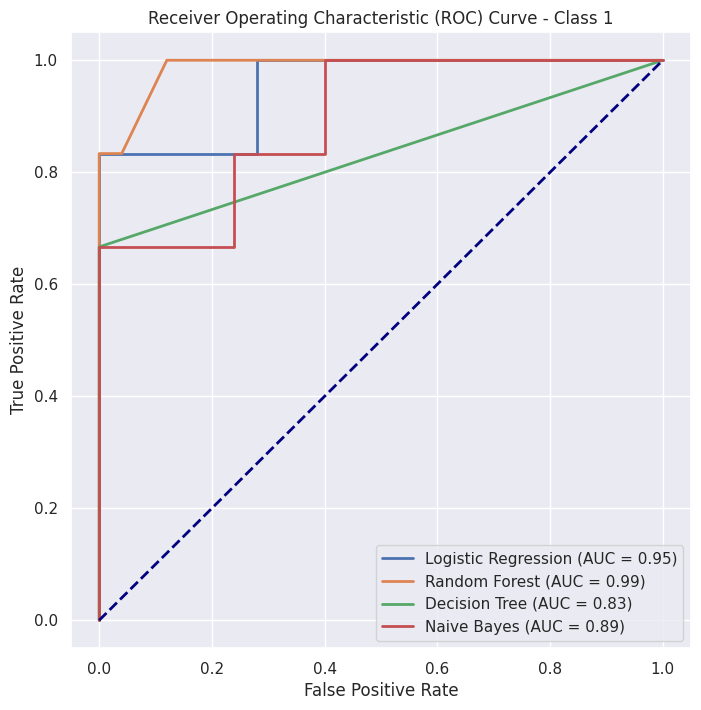

In [ ]:
import numpy as np
b.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize

# Assuming you have your data and labels
# X, y = ...

# Binarize the labels
y_bin = label_binarize(y, classes=np.unique(y))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
}

# Plot ROC curves for each model
plt.figure(figsize=(8, 8))

for model_name, model in models.items():
    model.fit(X_train, y_train[:, 0])  # Consider only the first class
    y_probabilities = model.predict_proba(X_test)[:, 1]  # Probability for class 1

    # Compute ROC curve and AUC for the first class
    fpr, tpr, _ = roc_curve(y_test[:, 0], y_probabilities)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Class 1')
plt.legend(loc='lower right')
plt.show()